# Lab | Matplotlib & Seaborn

#### Import all the necessary libraries here:

In [1]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Challenge 1

#### The data we will use in this challenge is:

In [2]:
x = np.arange(0, 100)
y = x * 2
z = x ** 2

#### Plot (x, y) and (x, z).
There are 2 ways of doing this. Do in both ways.

**Hint**: Check out the nrows, ncols and index arguments of subplots. 

Also, play around with the linewidth and style. Use the ones you're most happy with.

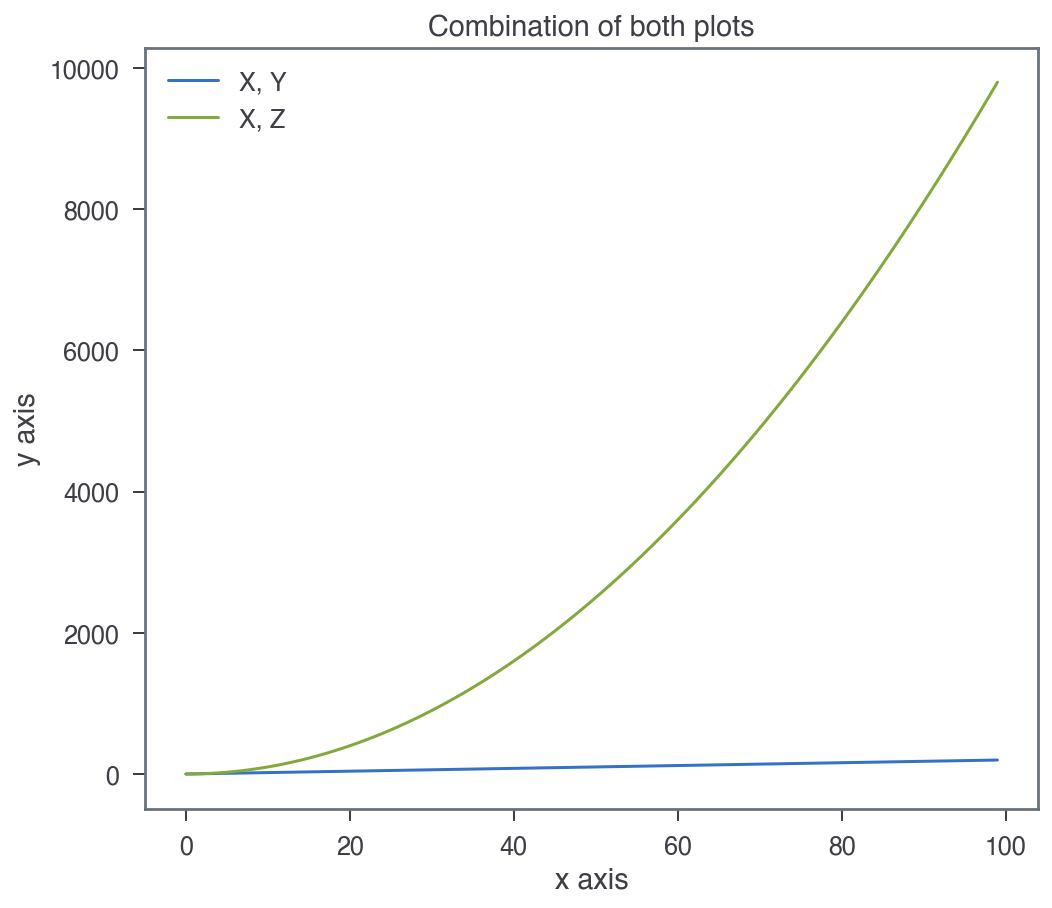

In [3]:
# Method 1

# Plotting both graphs that will end up in the same one
plt.plot(x, y, label = 'X, Y')
plt.plot(x, z, label = 'X, Z')

# Labeling the x and y axis
plt.xlabel('x axis')
plt.ylabel('y axis')

# Giving final plot a Title and Legend
plt.title('Combination of both plots')
plt.legend()

plt.savefig('Figures/fig1')

#### Use plt.subplots(nrows=1, ncols=2) to create the plot.

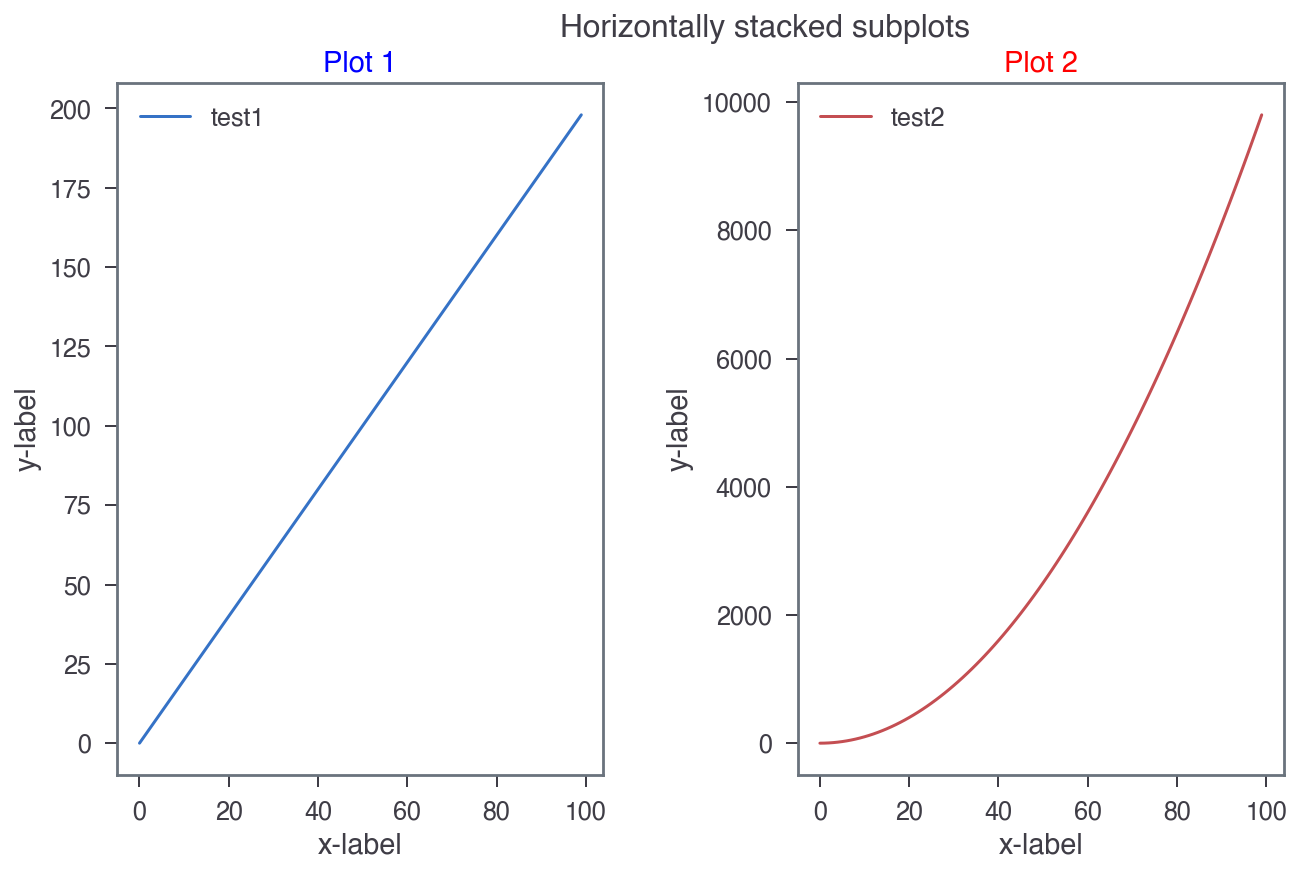

In [4]:
# Method 2
fig, axs = plt.subplots(1, 2, figsize = (12, 6)) # Can do vertical stacking if only leave '2'

# Title - seems kinda off-center, maybe 'cause the wspace? Changes a bit, but not much if no wspace
fig.suptitle('Horizontally stacked subplots')

# Finally found this. What I really wanted was the 'wspace' that I added there, so things aren't so
# close together and overlapping
plt.subplots_adjust(bottom = 0.1, right = 0.8, top = 0.9, wspace = 0.4)

# Plotting, giving colors, labels and titles
axs[0].plot(x, y, 'b-', label = 'test1')
axs[0].set_title('Plot 1', color = 'blue', fontweight = 'heavy')
# no difference between 'light' or 'heavy', it seems

axs[1].plot(x, z, 'r-', label = 'test2')
axs[1].set_title('Plot 2', color = 'red', fontweight = 'light')

# Labeling the axes
for ax in axs.flat:
    ax.set(xlabel = 'x-label', ylabel = 'y-label')

# Hide x labels and tick labels for top plots and y ticks for right plots.
# This works but then since the y range isn't the same, we lose the numbers on the y axis and that
# might be a problem
#for ax in axs.flat:
#    ax.label_outer()

# Showing the legend and plot
axs[0].legend()
axs[1].legend()

plt.savefig('Figures/fig2')

#### Use your previous code but now, resize your plot.
**Hint**: Add the figsize argument in plt.subplots().

If you want, try to add a title to the plot or even axes labels. You can also play with the fontweight and fontsize of the titles and labels. 

In [ ]:
# All this was already done above

#### Plot both $y=x^2$ and $y=e^x$ in the same plot using normal and logarithmic scale.
**Hint**: Use `set_xscale` and `set_yscale`.

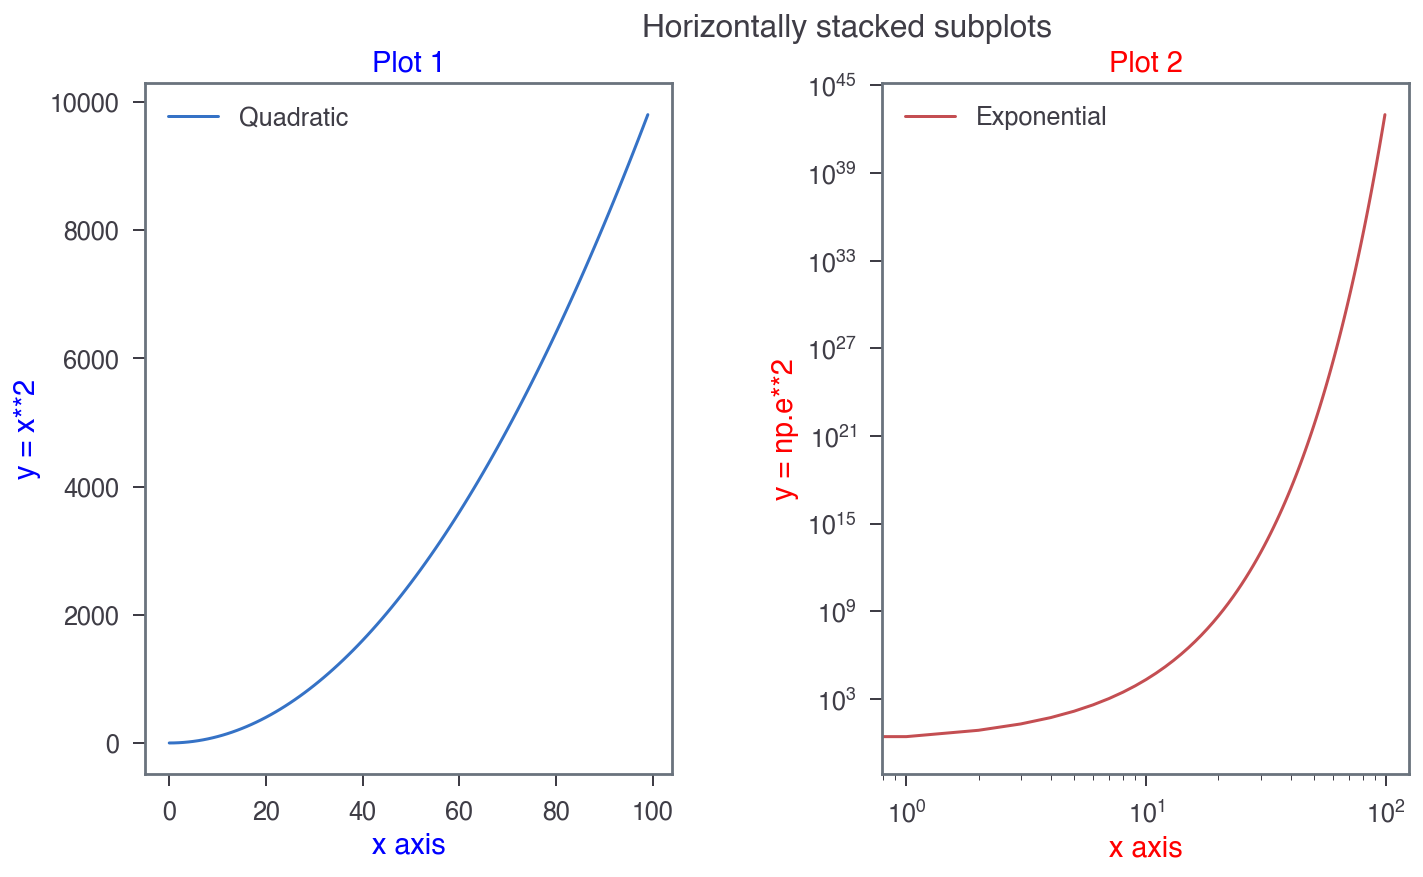

In [5]:
# your code here
fig, axs = plt.subplots(1, 2, figsize = (13, 6)) # Can do vertical stacking if only leave '2'
fig.suptitle('Horizontally stacked subplots') # Title

# Doing some adjustments
plt.subplots_adjust(bottom = 0.1, right = 0.8, top = 0.9, wspace = 0.4)

# Plotting, giving colors, labels and titles
# Don't know why my 'fontweight' isn't working?
axs[0].plot(x, x**2, 'b-', label = 'Quadratic')
axs[0].set_title('Plot 1', color = 'blue', fontweight = 'heavy')
axs[1].plot(x, np.e**x, 'r-', label = 'Exponential')
axs[1].set_title('Plot 2', color = 'red', fontweight = 'light')

# Labeling the axes. This time without the for-loop for more diversity?
axs[0].set_xlabel('x axis', fontweight = 'heavy', color = 'blue')
axs[0].set_ylabel('y = x**2', fontweight = 'heavy', color = 'blue')
axs[1].set_xlabel('x axis', fontweight = 'light', color = 'red')
axs[1].set_ylabel('y = np.e**2', fontweight = 'light', color = 'red')

# Setting the scales. Found this online. Is this it?
axs[0].set_xscale('linear')
axs[0].set_yscale('linear')
axs[1].set_xscale('log')
axs[1].set_yscale('log')

# Doing the legends
axs[0].legend()
axs[1].legend()

plt.savefig('Figures/fig3')

#### As a bonus challenge, try to add a legend to the plot.

In [ ]:
# Done above

## Challenge 2
#### Import the `Fitbit2` dataset and store it in a variable called `fitbit`. You can find the dataset in Ironhack's database:
* db: `fitbit`
* table: `fitbit2`

In [6]:
# your code here
fitbit = pd.read_csv('Fitbit2.csv')
fitbit

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,...,Distance_miles,Days,Days_encoded,Work_or_Weekend,Hours Sleep,Sleep efficiency,Yesterday_sleep,Yesterday_sleep_efficiency,Months,Months_encoded
0,2015-05-08,1934,905,0.65,0,1.355,46,0,0,1680,...,0.403891,Friday,4.0,1,6.400000,92.086331,0.000000,0.000000,May,5
1,2015-05-09,3631,18925,14.11,4,611.000,316,61,60,2248,...,8.767545,Saturday,5.0,0,7.566667,92.464358,6.400000,92.086331,May,5
2,2015-05-10,3204,14228,10.57,1,602.000,226,14,77,1719,...,6.567891,Sunday,6.0,0,6.450000,88.761468,7.566667,92.464358,May,5
3,2015-05-11,2673,6756,5.02,8,749.000,190,23,4,9620,...,3.119282,Monday,0.0,1,5.183333,88.857143,6.450000,88.761468,May,5
4,2015-05-12,2495,502,3.73,1,876.000,171,0,0,7360,...,2.317714,Tuesday,1.0,1,6.783333,82.892057,5.183333,88.857143,May,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,2016-05-03,3796,18588,14.13,16,599.000,275,49,79,236,...,8.779972,Tuesday,1.0,1,6.283333,91.951220,5.233333,90.229885,May,5
363,2016-05-04,3525,16382,12.39,16,684.000,333,10,55,2075,...,7.698787,Wednesday,2.0,1,6.766667,95.081967,6.283333,91.951220,May,5
364,2016-05-05,3649,21913,16.40,19,701.000,287,29,90,2249,...,10.190484,Thursday,3.0,1,4.666667,88.888889,6.766667,95.081967,May,5
365,2016-05-06,3539,19023,14.79,15,575.000,298,8,85,2112,...,9.190077,Friday,4.0,1,6.166667,89.805825,4.666667,88.888889,May,5


#### From the Fitbit data, we want to visually understand:

How the average number of steps change by month. Use the appropriate visualization to show the median steps by month. Is Fitbitter more active on weekend or workdays? All plots must be in the same jupyter notebook cell.

**Hints**:

* Use Months_encoded and Week_or_Weekend columns.
* Use matplolib.pyplot object oriented API.
* Set your size figure to 12,4
* Explore plt.sca
* Explore plt.xticks
* Save your figures in a folder called `figures` in your repo. 

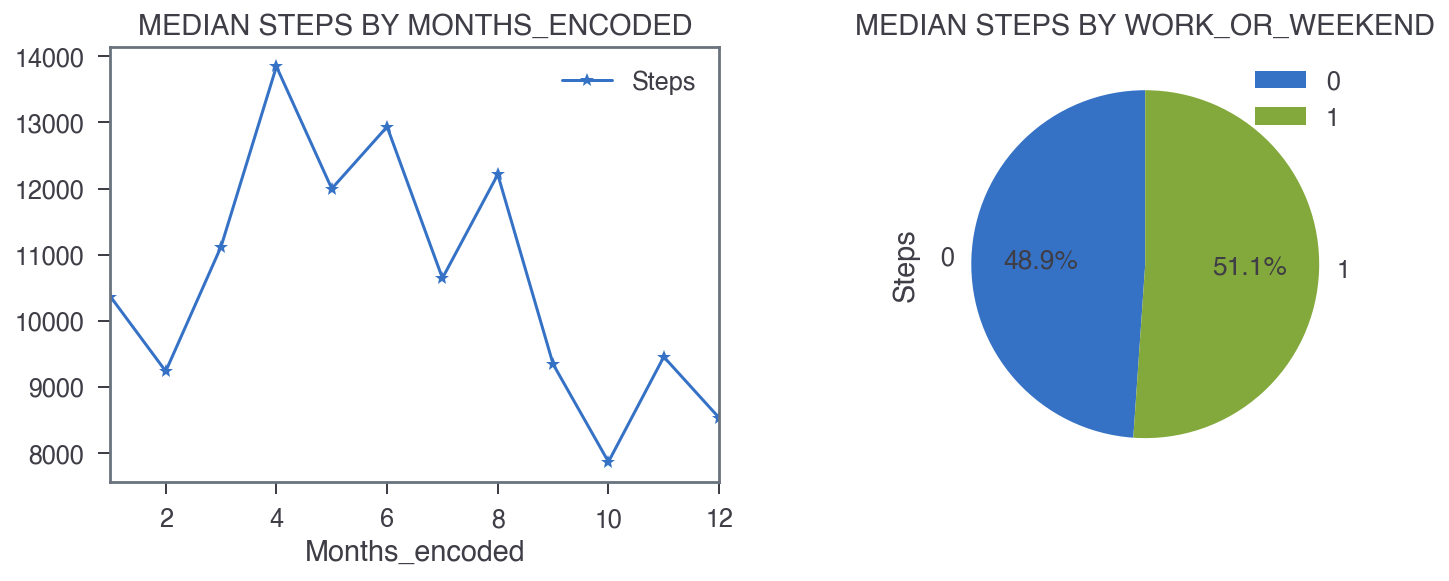

In [7]:
'''
Ok, I have a lot of questions about this exercise. It was kinda hard and I don't know why the
axs[0] = months_grouped.plot() method wasn't working?
I had to search online and then I found out I could stick the .plot after the groupby and start
writing the arguments and all that, as you can see, which is a bit strange, but whatever.

All the plots were looking kinda strange at first, giving errors, and there were 2 blank plots side 
by side on the first line, and then my actual plots were displayed below, one and then the other,
which did not correspond to the command (1, 2) for 1 row and 2 cols.
 
I will clean up this cell and try to reproduce the erros in the next cell. Please take a look.
'''
# Setting up the subplots
fig, axs = plt.subplots(1, 2, figsize = (12, 4))

# MEDIAN STEPS BY MONTH_ENCODED
months_grouped = fitbit.groupby('Months_encoded').agg({'Steps': 'median'})\
.plot(style = '*-', ax = axs[0])
#months_grouped.head()
axs[0].set_title('MEDIAN STEPS BY MONTHS_ENCODED')


# MEDIAN STEPS BY WORK_OR_WEEKEND
work_or_weekend = fitbit.groupby('Work_or_Weekend').agg({'Steps': 'median'})\
.plot(kind = 'pie', subplots = True, ax = axs[1], autopct='%1.1f%%', startangle = 90)
#work_or_weekend.head()
axs[1].set_title('MEDIAN STEPS BY WORK_OR_WEEKEND')


#plt.show()
# Don't understand why it's saving as a blank .png?? - plt.show() is the problem found out below
# Notice the '0 axes'??
plt.savefig('Figures/fig4')

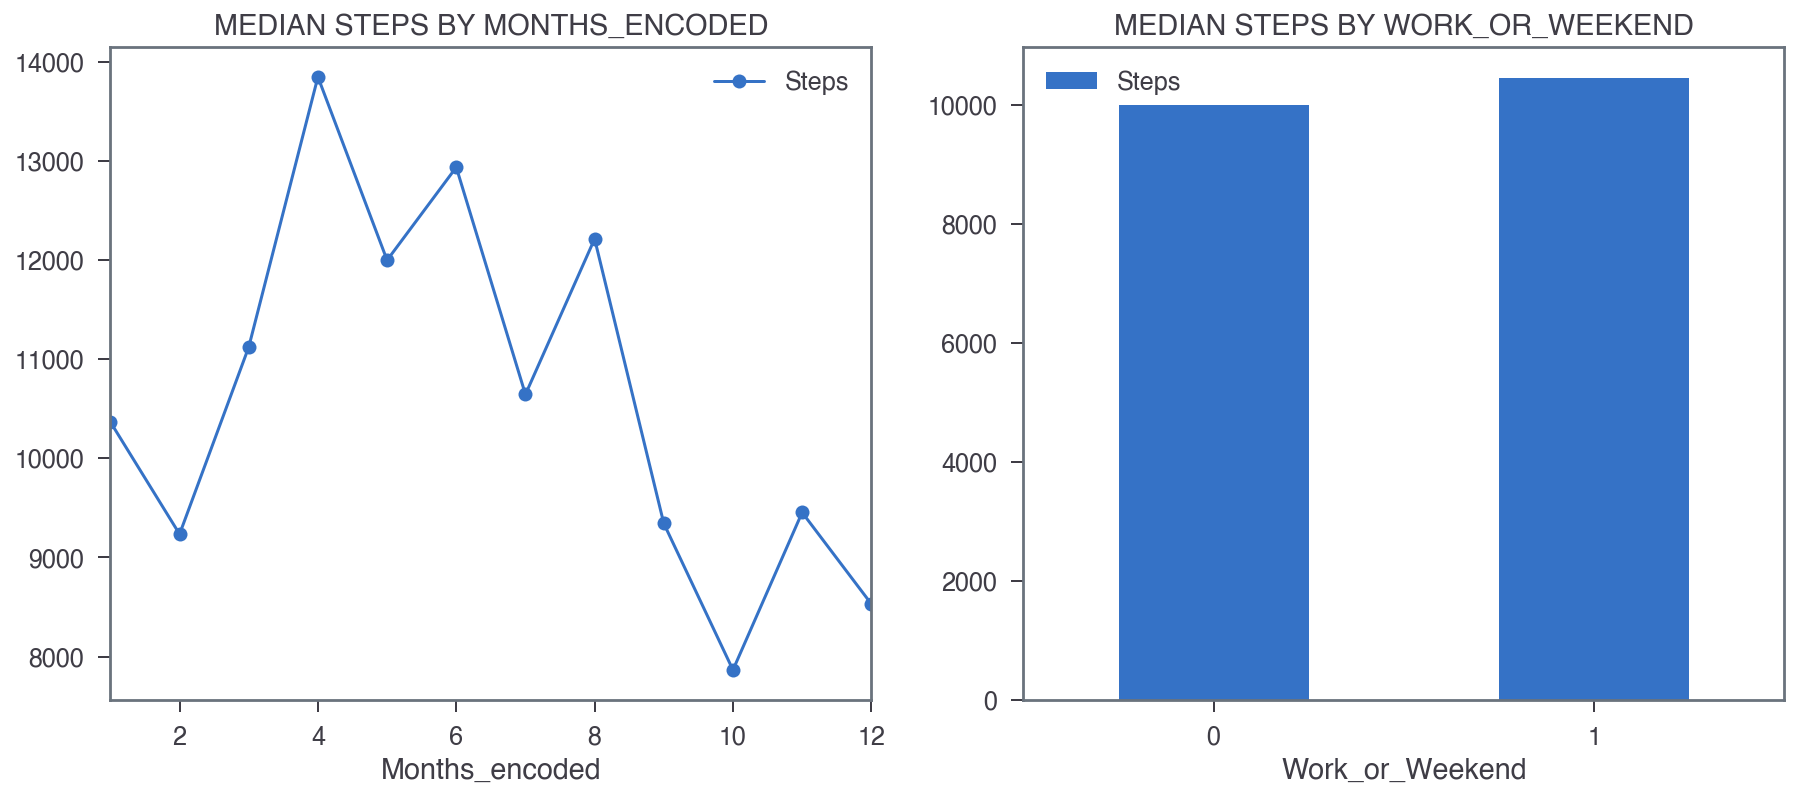

In [8]:
months_grouped = fitbit.groupby('Months_encoded').agg({'Steps': 'median'})
work_or_weekend = fitbit.groupby('Work_or_Weekend').agg({'Steps': 'median'})

# I changed the size to 15, 6 cuz 12, 4 is horrible and was cutting the x label when saved
# Also, notice that when saved the 'steps' legend on the bar plot goes to the middle of the bars? lol?
# Initially I tried 12, 6 but the 'steps' legend was getting mixed with the bar, so I tried 15, 6
fig, axs = plt.subplots(1, 2, figsize = (15, 6))

# THESE FIRST 2 WORKED, BUT SEEM WRONG?? HOWEVER, THE OTHER 2 SEEM 'REALLY' TO WORK?
#axs[0] = months_grouped.plot(style = 'o-') # also, maybe the 'o' looks better than the *. It's bigger
#axs[1] = work_or_weekend.plot(kind = 'bar', rot = 360)
months_grouped.plot(style = 'o-', ax = axs[0])
axs[0].set_title('MEDIAN STEPS BY MONTHS_ENCODED')

work_or_weekend.plot(kind = 'bar', rot = 360, ax = axs[1])
axs[1].set_title('MEDIAN STEPS BY WORK_OR_WEEKEND')

# woooooow, it seems the reason I'm getting a blank png is because of the show command lol
#plt.show()
plt.savefig('Figures/fig5')

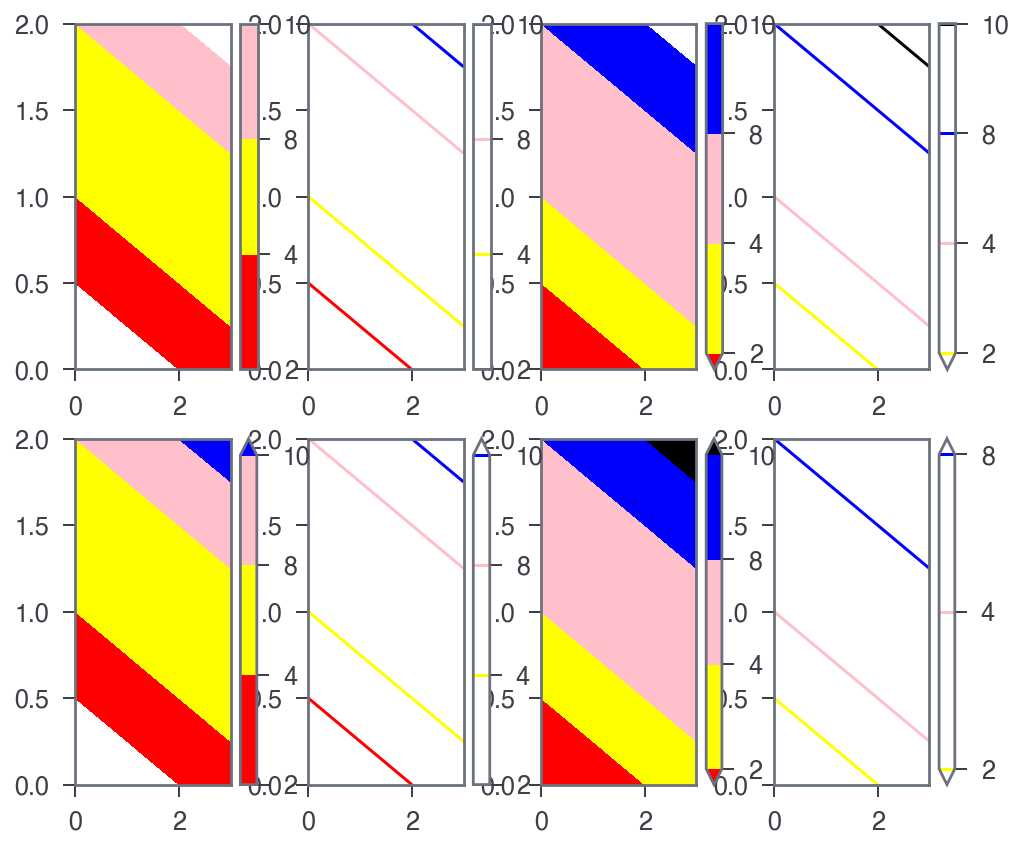

In [9]:
# COLOR TESTING DONE IN CLASS
def test_given_colors_levels_and_extends():
    _, axes = plt.subplots(2, 4)
    data = np.arange(12).reshape(3, 4)
    colors = ['red', 'yellow', 'pink', 'blue', 'black']
    levels = [2, 4, 8, 10]
    for i, ax in enumerate(axes.flatten()):
        plt.sca(ax)
        filled = i % 2 == 0.
        extend = ['neither', 'min', 'max', 'both'][i // 2]
        if filled:
            last_color = -1 if extend in ['min', 'max'] else None
            plt.contourf(data, colors=colors[:last_color], levels=levels,
                         extend=extend)
        else:
            last_level = -1 if extend == 'both' else None
            plt.contour(data, colors=colors, levels=levels[:last_level],
                        extend=extend)
        plt.colorbar()

test_given_colors_levels_and_extends()

#### Write a loop to plot 3 scatter plots of the following features:

* Minutes Lightly Active vs Steps    
* Minutes Very Active vs Steps    
* Minutes Sedentary vs Steps  

In [ ]:
# your code here
# Will look into this later. It's probably something strange like that for loop above in the color test

## Challenge 3

#### Import the `titanic` dataset and store it in a variable called `titanic`. You can find the dataset in Ironhack's database:
* db: `titanic`
* table: `titanic`

In [10]:
# your code here
titanic = pd.read_csv('titanic.csv')
titanic

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,U0,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,U0,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,U0,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,29.513190,0,0,A.5. 3236,8.0500,U0,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.000000,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.500000,0,0,SOTON/O.Q. 3101262,7.2500,U0,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,29.513190,0,0,359309,8.0500,U0,S


#### Explore the titanic dataset using Pandas dtypes.

In [11]:
# your code here
titanic.dtypes

PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Gender          object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

#### What are your numerical variables? What are your categorical variables?
**Hint**: Use Pandas select_dtypes.

In [12]:
# NUMERICAL VARIABLES
# If we add the .columns we get just the name, but I think it's nice to actually see the DF
titanic.select_dtypes(['int', 'float'])#.columns

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0.0,3,22.000000,1,0,7.2500
1,2,1.0,1,38.000000,1,0,71.2833
2,3,1.0,3,26.000000,0,0,7.9250
3,4,1.0,1,35.000000,1,0,53.1000
4,5,0.0,3,35.000000,0,0,8.0500
...,...,...,...,...,...,...,...
1304,1305,NaN,3,29.513190,0,0,8.0500
1305,1306,NaN,1,39.000000,0,0,108.9000
1306,1307,NaN,3,38.500000,0,0,7.2500
1307,1308,NaN,3,29.513190,0,0,8.0500


In [13]:
# CATEGORICAL VARIABLES
titanic.select_dtypes('object')#.columns

,Name,Gender,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,U0,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,U0,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,U0,S
...,...,...,...,...,...
1304,"Spector, Mr. Woolf",male,A.5. 3236,U0,S
1305,"Oliva y Ocana, Dona. Fermina",female,PC 17758,C105,C
1306,"Saether, Mr. Simon Sivertsen",male,SOTON/O.Q. 3101262,U0,S
1307,"Ware, Mr. Frederick",male,359309,U0,S


#### Set the plot style to classic and the figure size to (12,6).
**Hint**: To set the style you can use matplotlib or seaborn functions. Do some research on the matter.

In [14]:
# This looks horrible btw.
plt.style.use("classic")

#### Use the right visulalization to show the distribution of column `Age`.

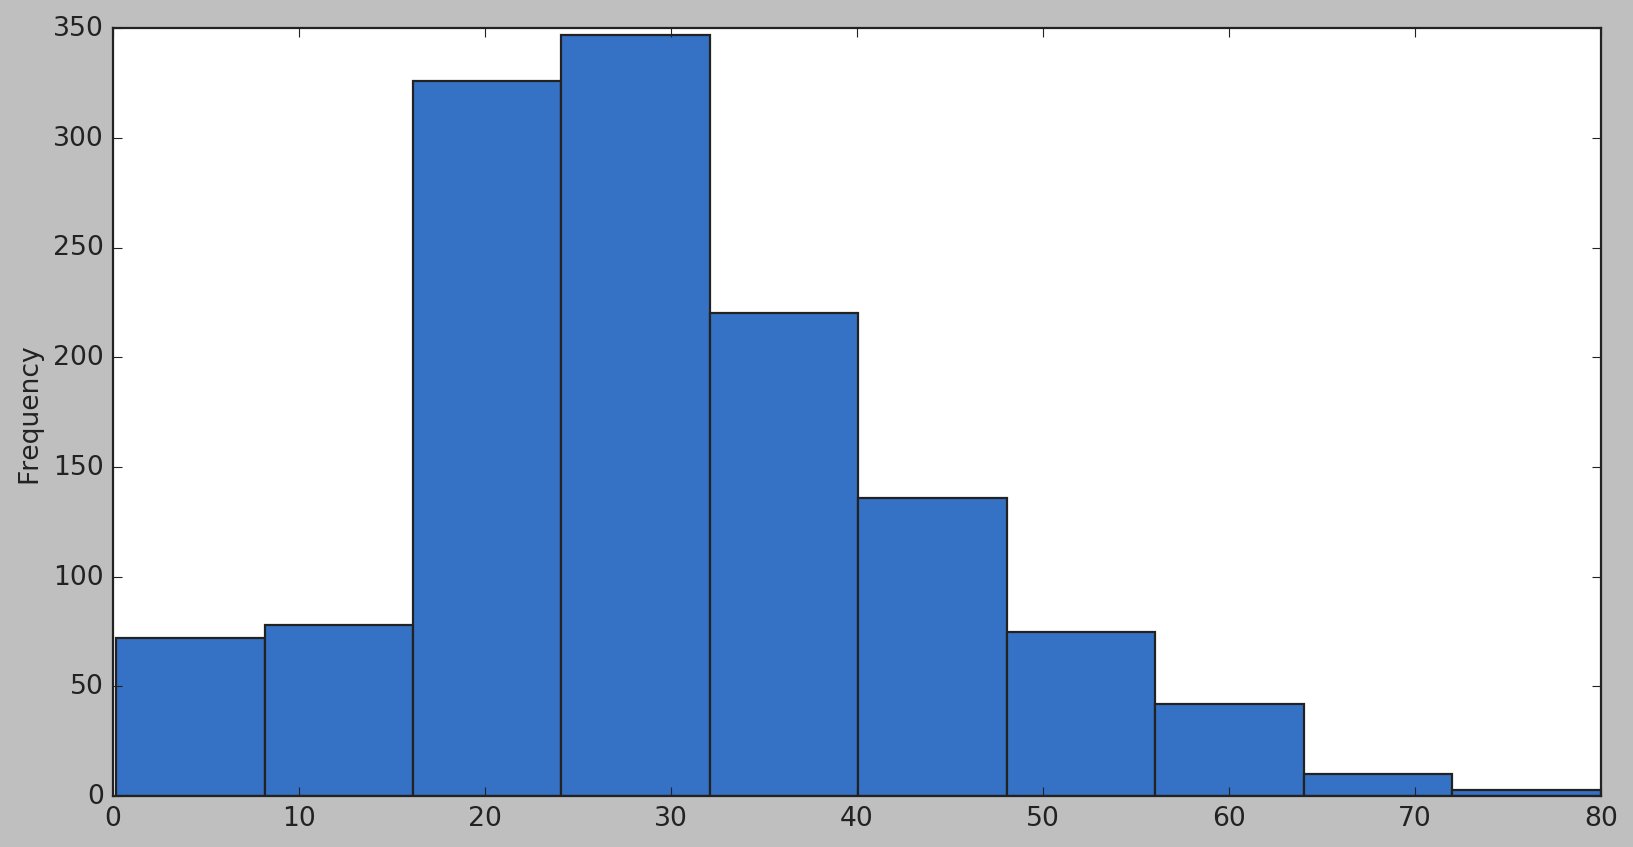

In [15]:
# Why does this give me an awful graph if I choose the 'bar' kind? As opposed to the 'hist' type?
# I guess it has to do with the x axis maybe? Or one of them at least

# This already gives me the y label. Less work! :)
titanic['Age'].plot(kind = 'hist', figsize = (12, 6));
#titanic['Age'].hist(); # here the style seems to change slightly - grid is added and lose y label

# Can also do it like this
#plt.hist(titanic['Age'])

plt.savefig('Figures/fig6')

#### Use subplots and plot the distribution of the `Age`  with bins equal to 10, 20 and 50.

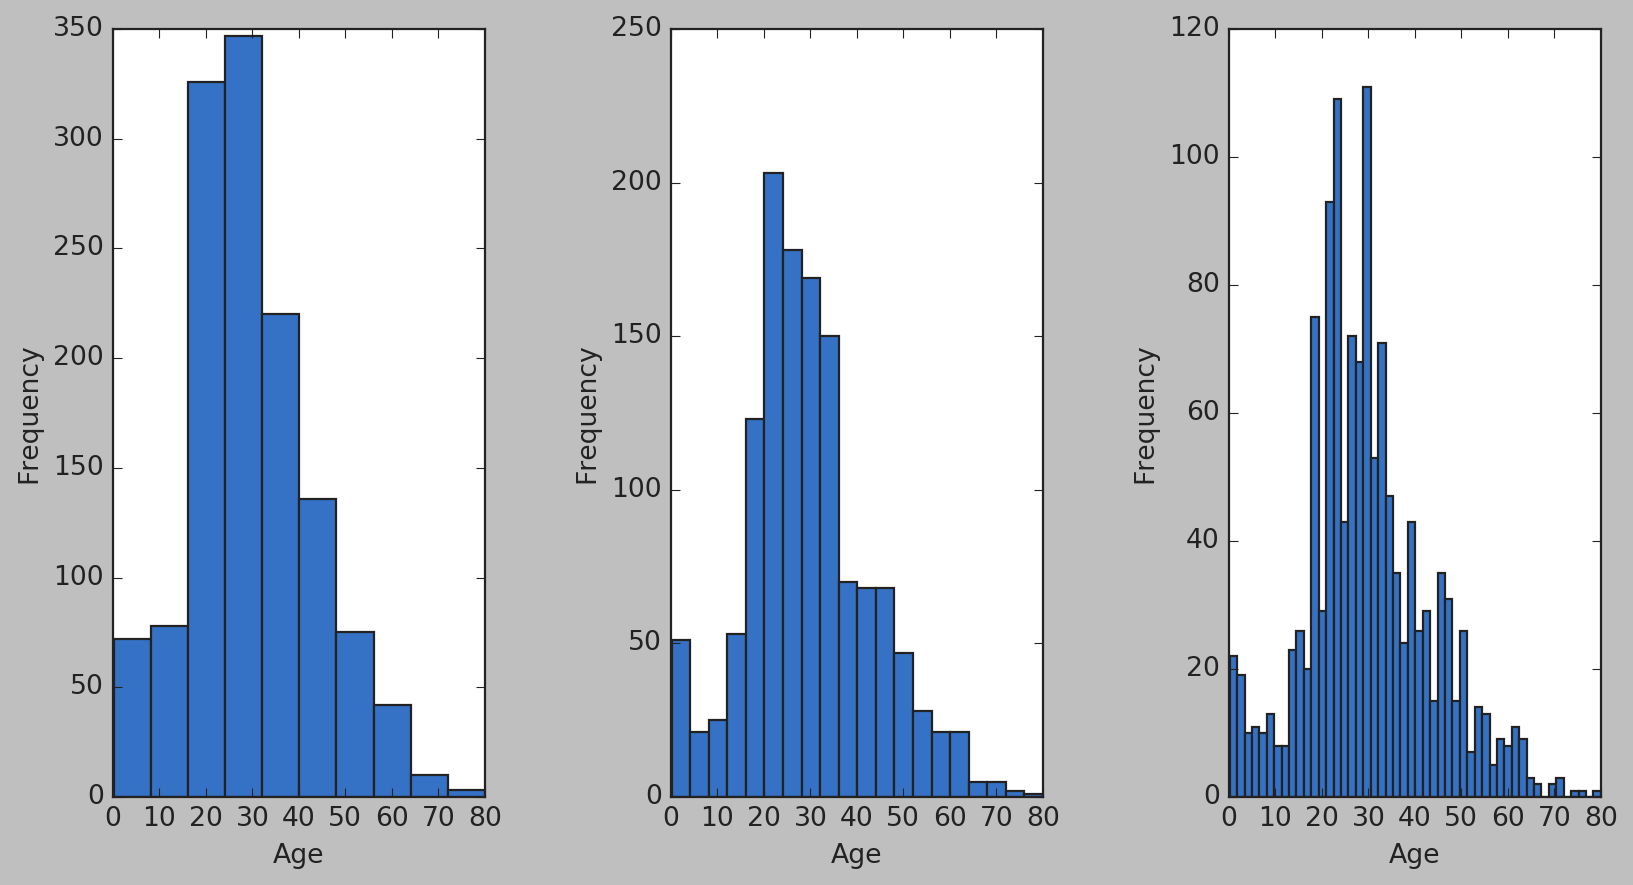

In [16]:
fig, axs = plt.subplots(1, 3, figsize = (12, 6))#, sharey = True) better not to share y, I guess?
plt.subplots_adjust(wspace = 0.5)

titanic["Age"].plot(kind = 'hist', bins = 10, ax = axs[0])
axs[0].set_xlabel('Age')

titanic["Age"].plot(kind = 'hist', bins = 20, ax = axs[1])
axs[1].set_xlabel('Age')

titanic["Age"].plot(kind = 'hist', bins = 50, ax = axs[2])
axs[2].set_xlabel('Age')

plt.savefig('Figures/fig7')

#### How does the bin size affect your plot?

In [ ]:
"""
The bin sizes change how we view the data and their distribution. 
The frequency starts diminishing, as we can see from the range of the y axis.

From the internet:
A 'bin' for each sample point gives us no more information, but only stretches the width of the chart.
A good bin width will usually show a recognizable normal probability distribution curve,
unless the data is really multi-modal.
Then there could be two or more distinct 'humps' in the histogram chart.
"""

#### Use seaborn to show the distribution of column `Age`.

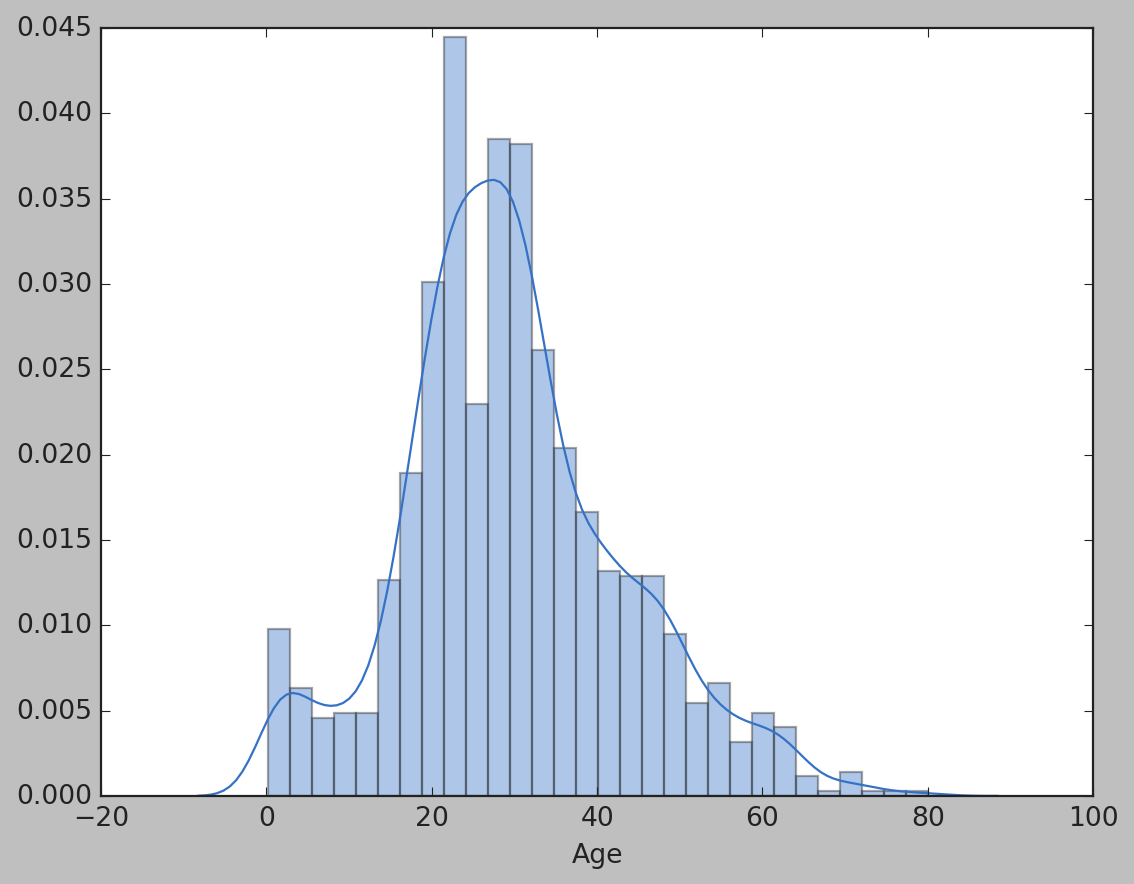

In [17]:
# your code here
# What are those -20 and 100 doing there?
sns.distplot(titanic['Age']);
plt.savefig('Figures/fig8')

#### Use the right plot to visualize column `Gender`. There are 2 ways of doing it. Do it both ways.
**Hint**: Use matplotlib and seaborn.

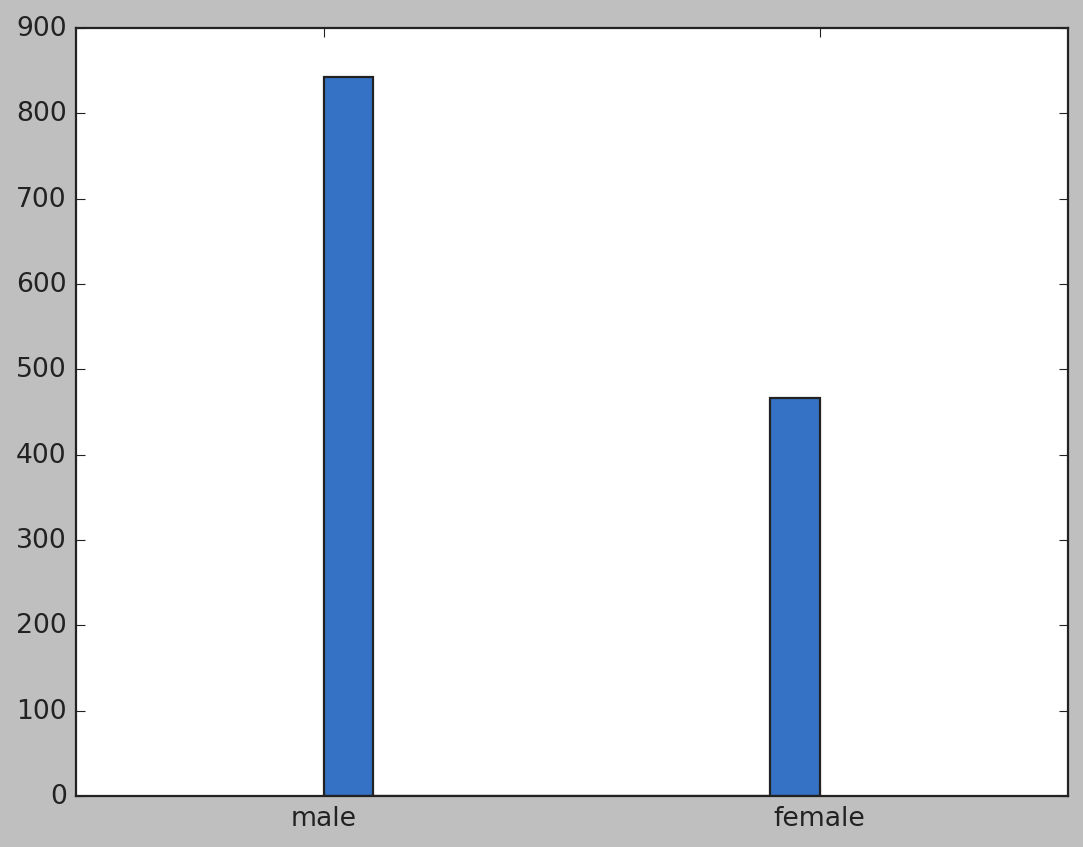

In [18]:
# Method 1 - matplotlib
# your code here
#titanic['Gender'].plot(kind = 'hist') # this one doesn't seem to work. No numbers :(

plt.hist(titanic['Gender']);
plt.margins(x = 0.5)
plt.savefig('Figures/fig9')

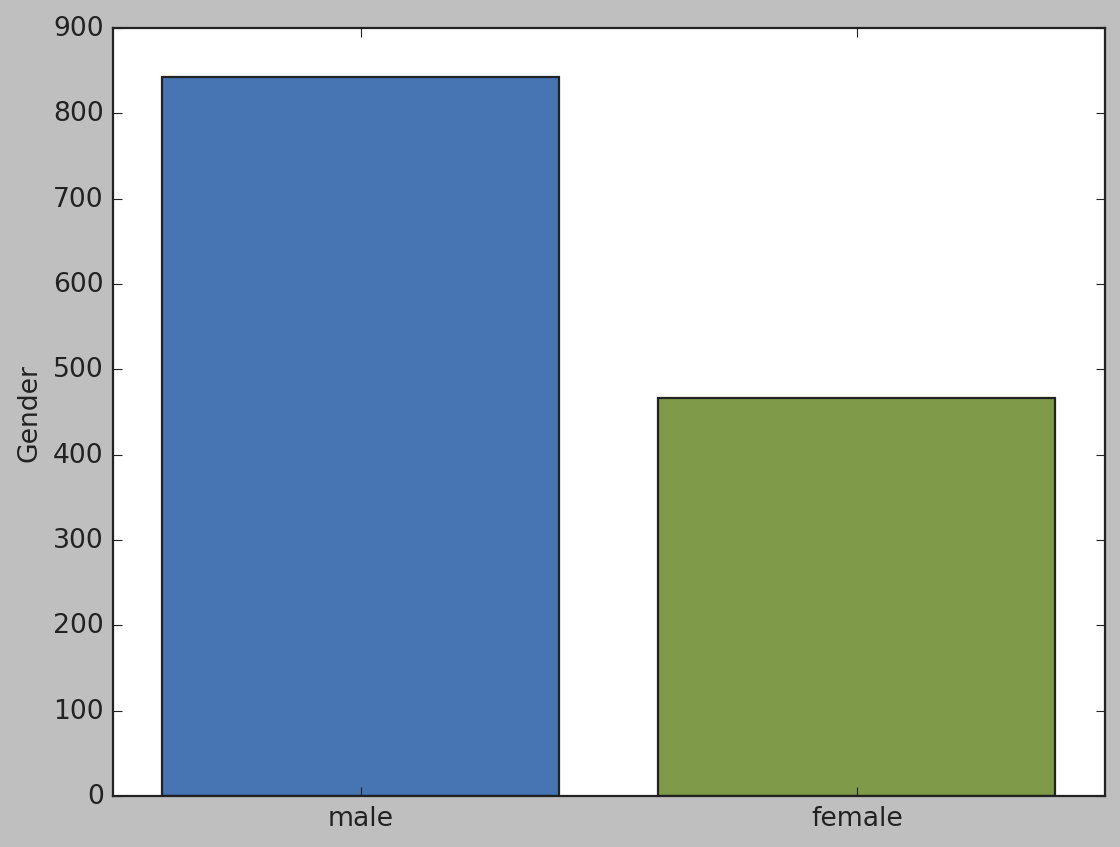

In [19]:
# Method 2 - seaborn
# your code here
gender = titanic['Gender'].value_counts()
sns.barplot(x = gender.index, y = gender);
plt.savefig('Figures/fig10')

#### Use the right plot to visualize the column `Pclass`.

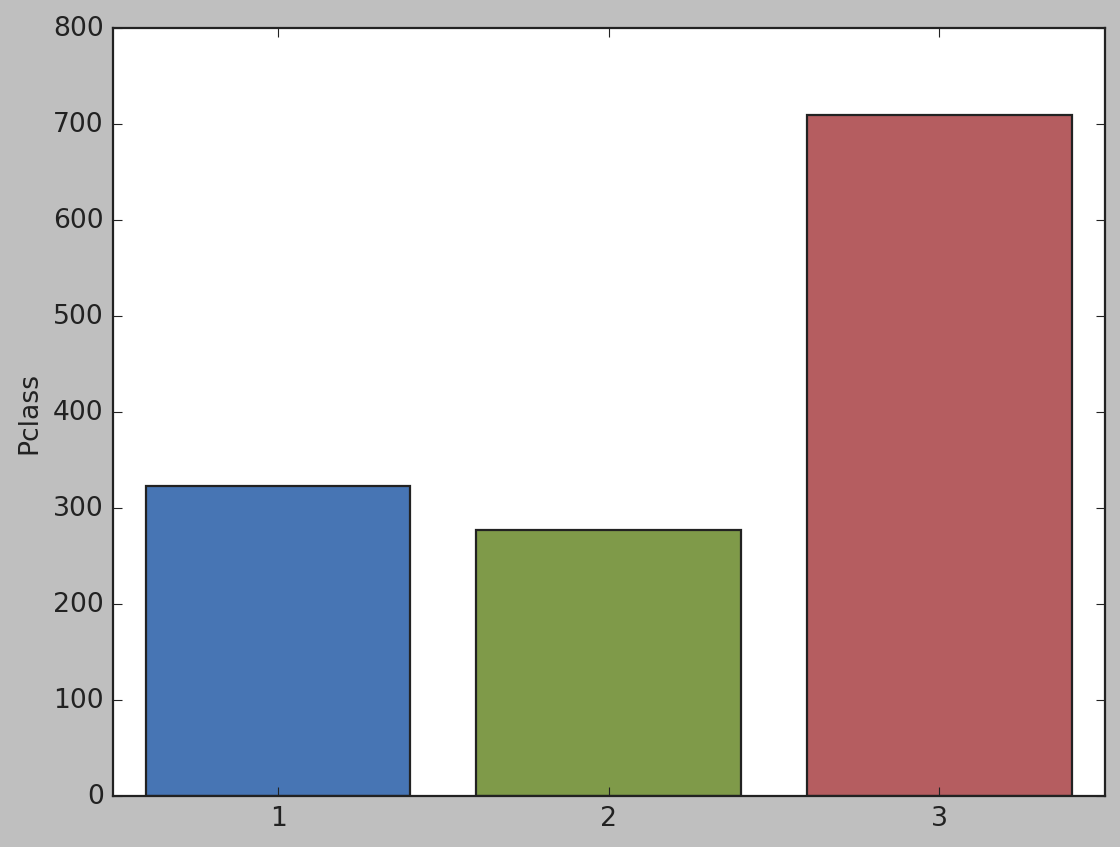

In [20]:
# Can do it the same way I did above, I guess?
pclass = titanic['Pclass'].value_counts()
sns.barplot(x = pclass.index, y = pclass);
plt.savefig('Figures/fig11')

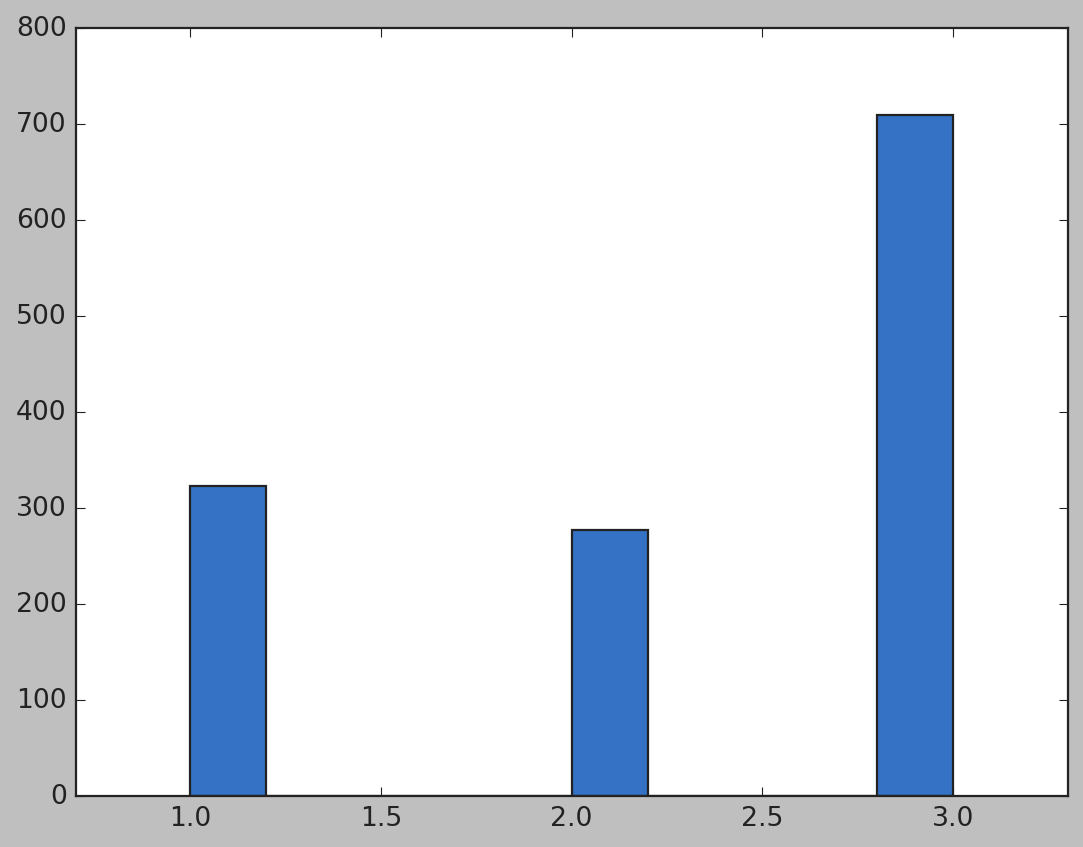

In [21]:
# Can also do it like this. Kinda faster, but the other one looks better, I think (better x axis above)
plt.hist(titanic['Pclass'])
plt.margins(x = 0.15)
plt.savefig('Figures/fig12')

#### We would like to have in one single plot the summary statistics of the feature `Age`. What kind of plot would you use? Plot it. 

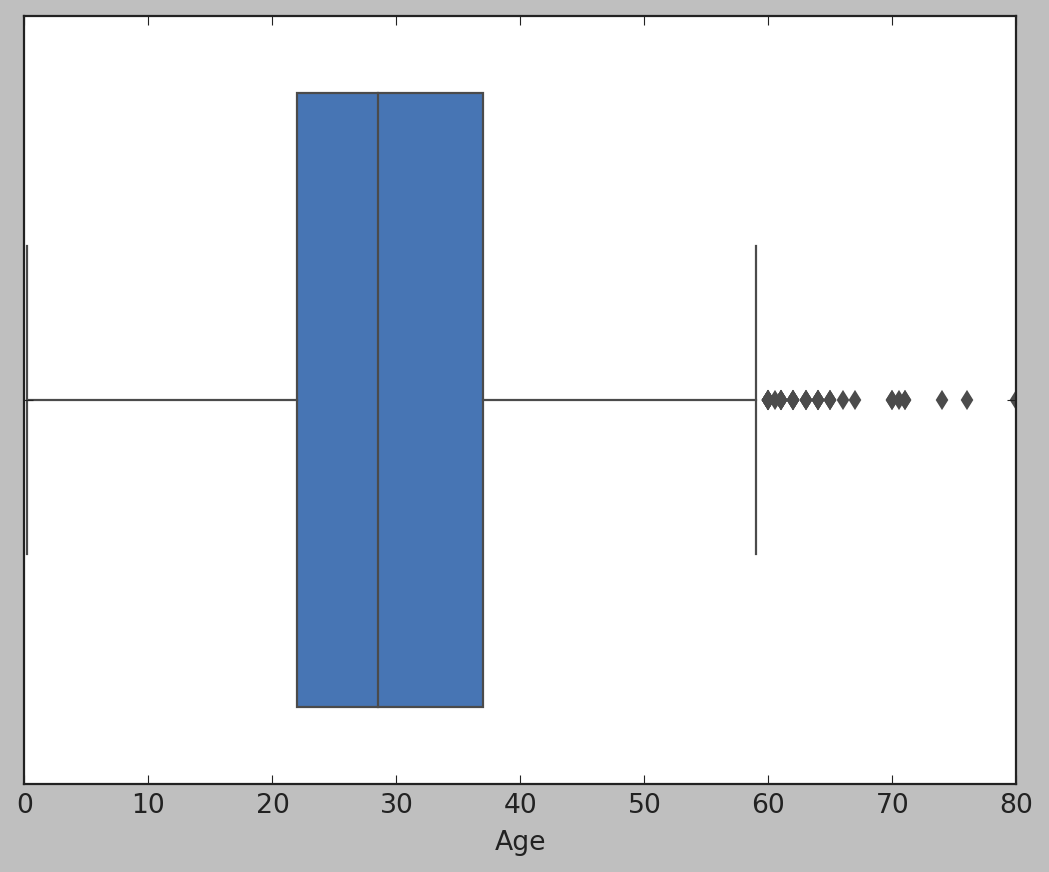

In [22]:
# your code here
sns.boxplot(titanic['Age']);
plt.savefig('Figures/fig13')

In [ ]:
"""
With the box plot we can see, in order, the min, whisker area, Q1, Q2 = median, Q3, whisker area, max
and the outliers
"""

#### What does the last plot tell you about the feature `Age`?

In [ ]:
"""
It tells us the values for each of the categories I mentioned above:
Min.: around 0
Q1: around 21
Q2 = Median: around 28, 29
Q3: around 37
Max.: around 58, 59
Outliers: in the range after max till the end - 60-80
"""

#### Now in addition to the summary statistics, we want to have in the same plot the distribution of `Age`. What kind of plot would you use? Plot it. 

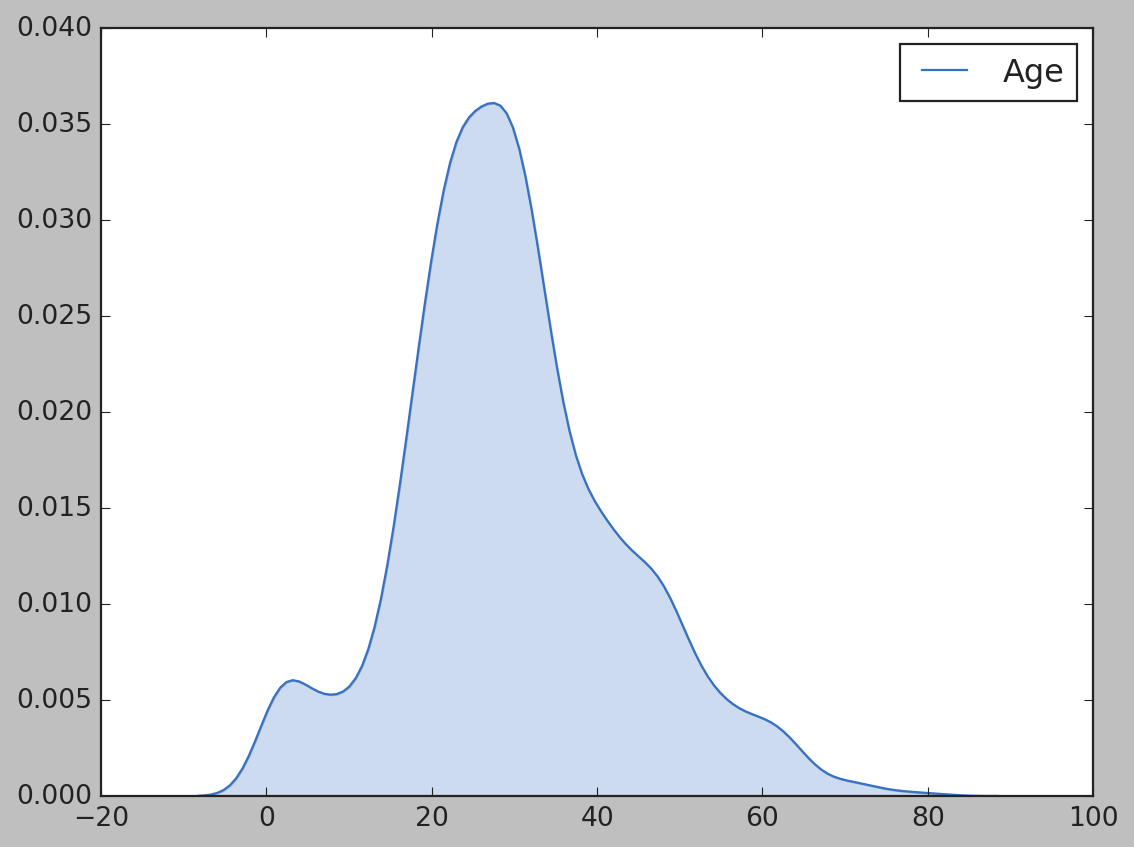

In [23]:
# I don't know, maybe this is a good choice?
sns.kdeplot(titanic['Age'], shade = True);
plt.savefig('Figures/fig14')

# The violin plot might also be an interesting choice? But I think the kdeplot looks better
#sns.violinplot(titanic['Age']);

#### What additional information does the last plot provide about feature `Age`?

In [ ]:
"""
your comments here
"""

#### We suspect that there is a linear relationship between `Fare` and `Age`. Use the right plot to show the relationship between these 2 features. There are 2 ways, please do it both ways.
**Hint**: Use matplotlib and seaborn.

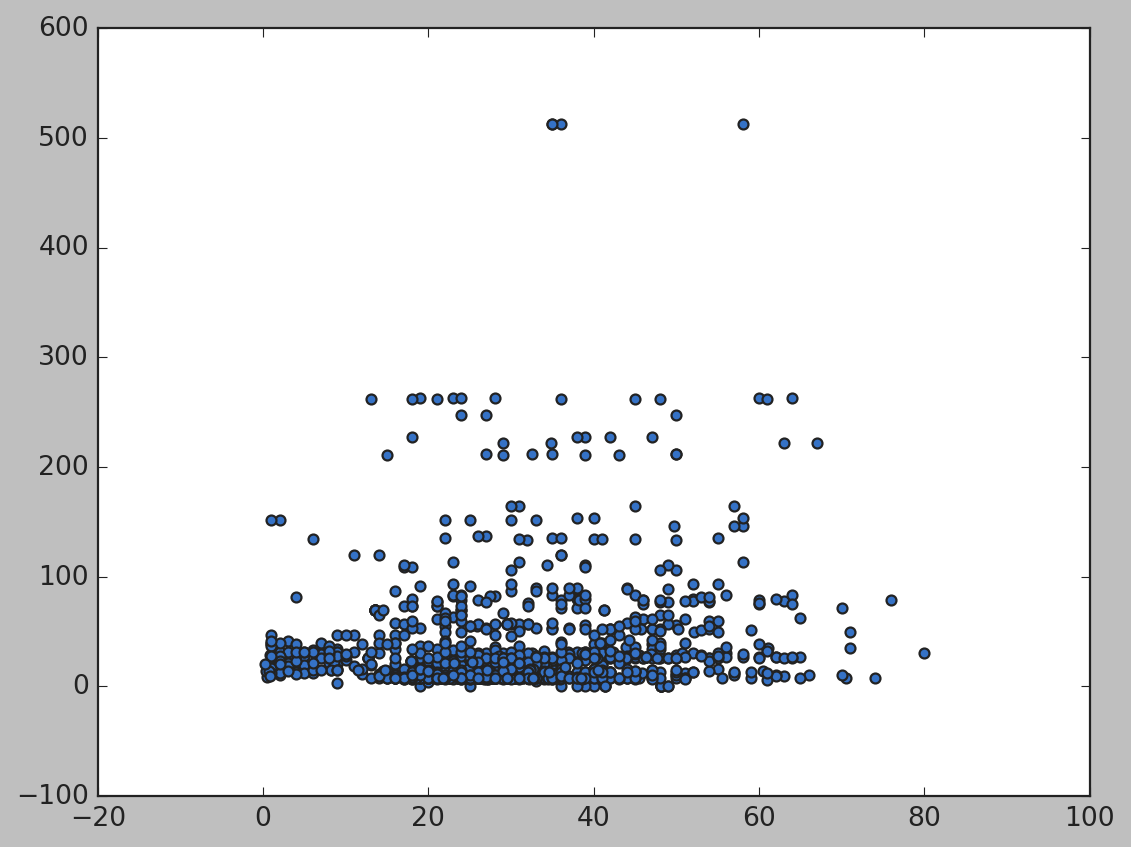

In [24]:
# Method 1 - matplotlib
plt.scatter(x = 'Age', y = 'Fare', data = titanic);
plt.savefig('Figures/fig15')

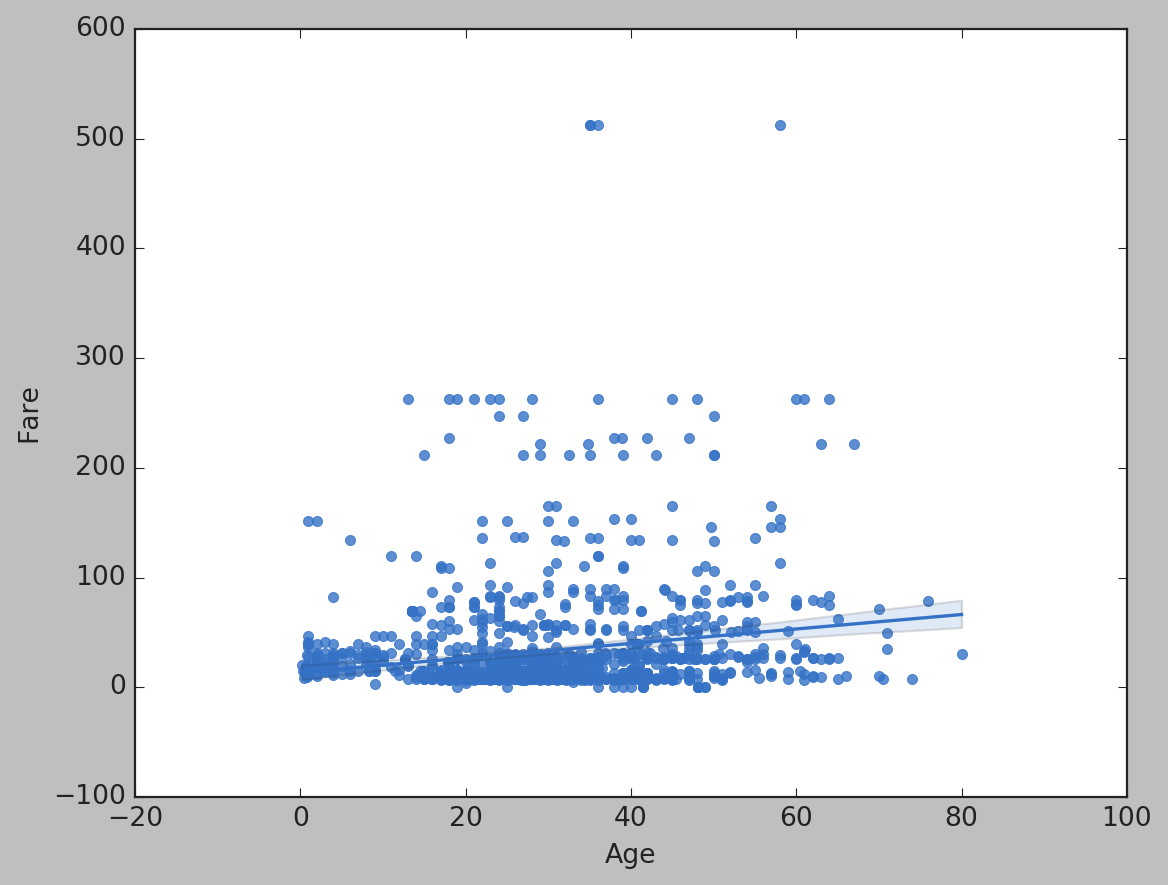

In [25]:
# Method 2 - seaborn
sns.regplot(x = 'Age', y = 'Fare', data = titanic);
plt.savefig('Figures/fig16')

#### Plot the correlation matrix using seaborn.

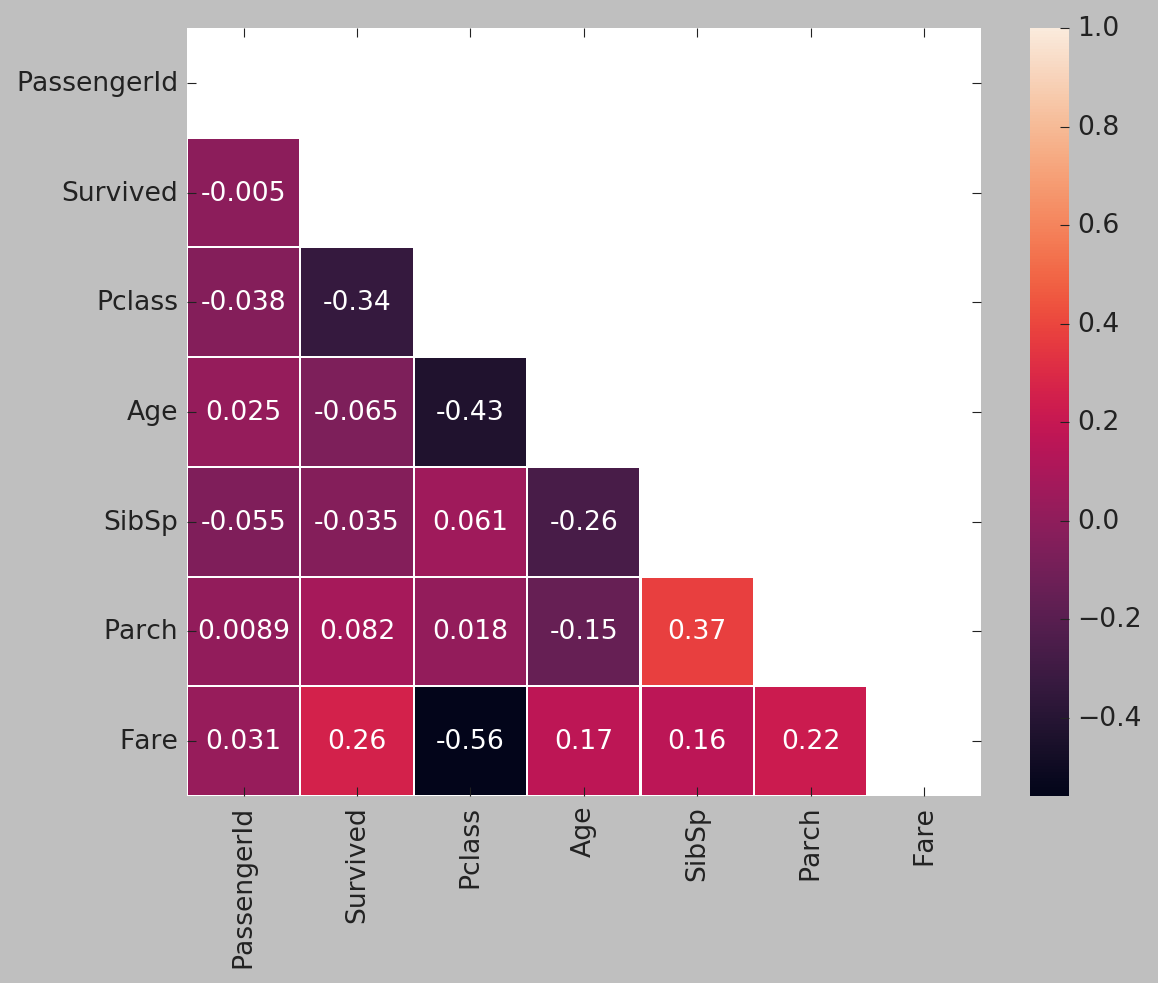

In [26]:
correlation = titanic.corr()
mask = np.triu(np.ones_like(correlation, dtype=np.bool)); # to cut the duplicate part of the matrix
sns.heatmap(correlation, linewidths = 0.5, annot = True, mask = mask);

plt.savefig('Figures/fig17') # not saving the whole pic for some reason :/

#### What are the most correlated features?

In [ ]:
"""
There doesn't seem to exist any? The 'highest' one is Parch x SibSp.
"""

#### Use the most appropriate plot to display the summary statistics of `Age` depending on `Pclass`.

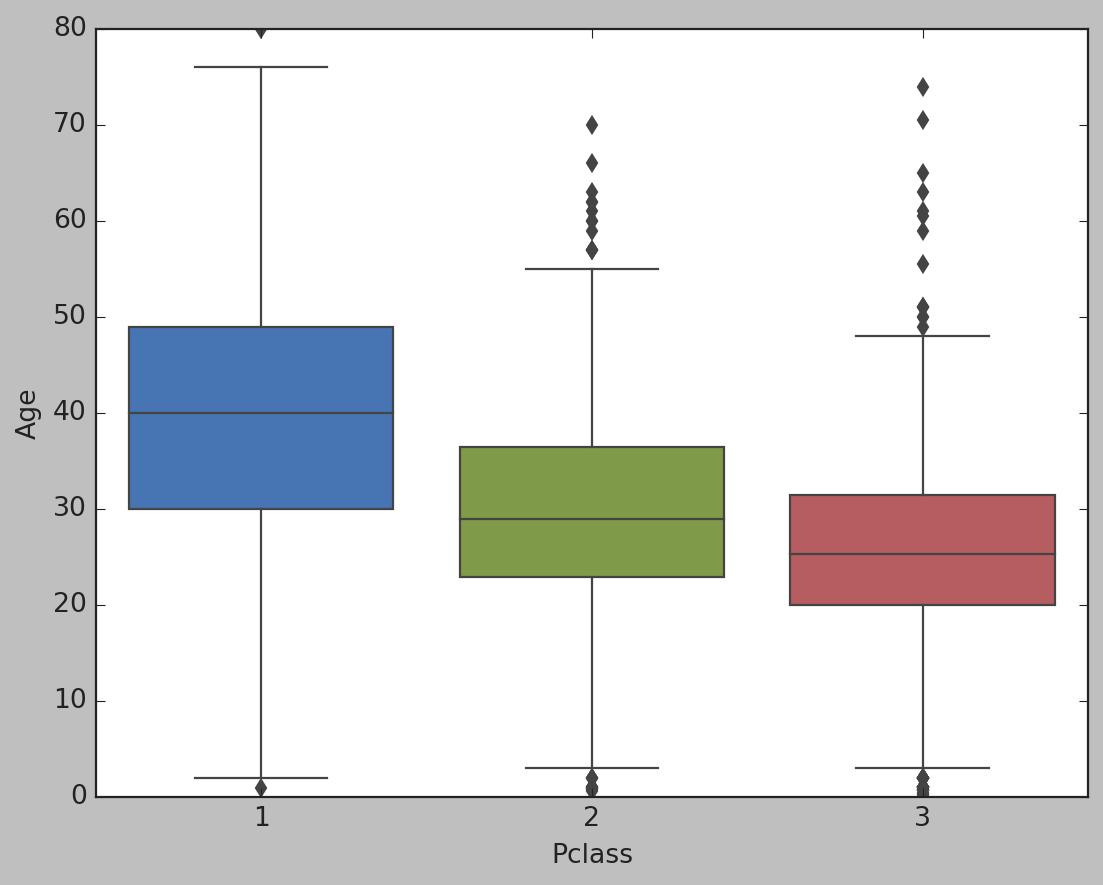

In [27]:
sns.boxplot('Pclass', 'Age', data = titanic);
plt.savefig('Figures/fig18')

#### Use seaborn to plot the distribution of `Age` based on the `Gender`.
**Hint**: Use Facetgrid.

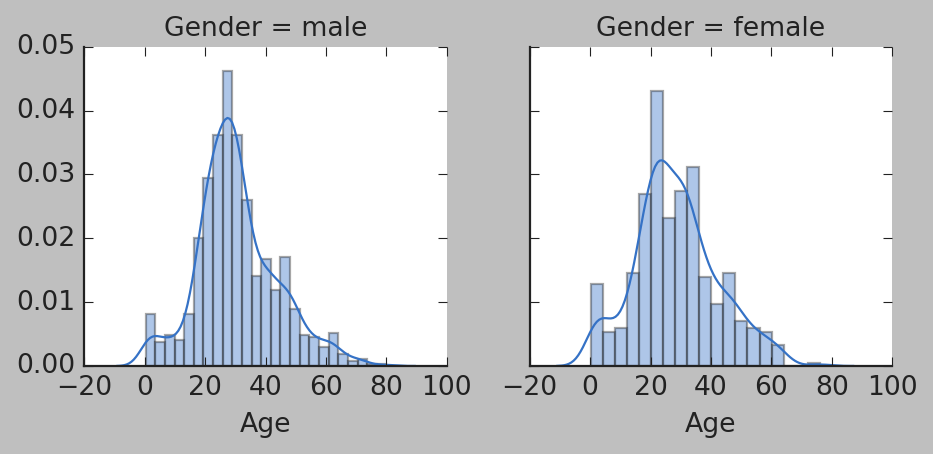

In [28]:
# Strange thing this Facetgrid. Also, why isn't the y axis showing the count of male and female?
age_gender = sns.FacetGrid(titanic, col = 'Gender')
age_gender.map(sns.distplot, 'Age');
#age_gender.map(sns.kdeplot, 'Age');
plt.savefig('Figures/fig19')

# Doesn't hurt to try. If only this worked
#sns.distplot(titanic["Age"], titanic["Gender"]);